### Import

In [5]:
import os

In [6]:
import numpy as np
import pandas as np

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from IPython.display import display
from PIL import Image

In [9]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

### First steps

In [10]:
DATA_PATH = 'data'

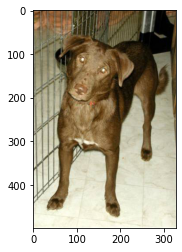

In [11]:
dog_img_name = os.path.join(DATA_PATH, 'train/dog/1.jpg')
dog_img = plt.imread(dog_img_name)
plt.imshow(dog_img)
plt.show()

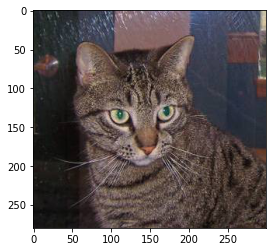

In [12]:
cat_img_name = os.path.join(DATA_PATH, 'train/cat/1.jpg')
cat_img = plt.imread(cat_img_name)
plt.imshow(cat_img)
plt.show()

### Train preparation

In [13]:
# dimensions of our images.
img_width, img_height = 150, 150

In [14]:
epochs = 20
batch_size = 16

In [15]:
train_data_dir = os.path.join(DATA_PATH, 'train')
validation_data_dir = os.path.join(DATA_PATH, 'validation')
test_data_dir = os.path.join(DATA_PATH, 'test')

nb_train_samples = len(os.listdir(os.path.join(DATA_PATH, 'train/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'train/cat')))
nb_validation_samples = len(os.listdir(os.path.join(DATA_PATH, 'validation/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'validation/cat')))

In [16]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create neural network

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

2021-11-13 22:39:38.709697: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Data preparation

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [21]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


### Training

In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/2x/6b0z8df95zx4kcymdzxw3tt40000gp/T/ipykernel_95185/818546861.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
1250/1250 [==============================] - 305s 243ms/step - loss: 0.6241 - accuracy: 0.6582 - val_loss: 0.5820 - val_accuracy: 0.7200
Epoch 2/20
1250/1250 [==============================] - 303s 243ms/step - loss: 0.5386 - accuracy: 0.7378 - val_loss: 0.4763 - val_accuracy: 0.7877
Epoch 3/20
1250/1250 [==============================] - 295s 236ms/step - loss: 0.5027 - accuracy: 0.7670 - val_loss: 0.4354 - val_accuracy: 0.8061
Epoch 4/20
1250/1250 [==============================] - 305s 244ms/step - loss: 0.4809 - accuracy: 0.7764 - val_loss: 0.4388 - val_accuracy: 0.8017
Epoch 5/20
1250/1250 [==============================] - 294s 236ms/step - loss: 0.4653 - accuracy: 0.7890 - val_loss: 0.4059 - val_accuracy: 0.8209
Epoch 6/20
1250/1250 [==============================] - 296s 237ms/step - loss: 0.4500 - accuracy: 0.8026 - val_loss: 0.4400 - val_accuracy: 0.8245
Epoch 7/20
1250/1250 [==============================] - 293s 235ms/step - loss: 0.4398 - accuracy: 0.8101 - val_

### Model evaluation

In [27]:
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
scores = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/var/folders/2x/6b0z8df95zx4kcymdzxw3tt40000gp/T/ipykernel_95185/4180287993.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)



accuracy: 85.06%


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

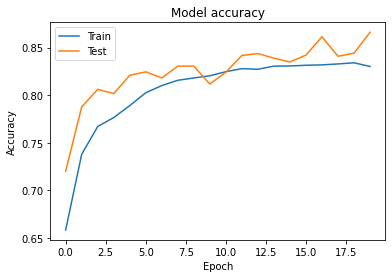

In [32]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

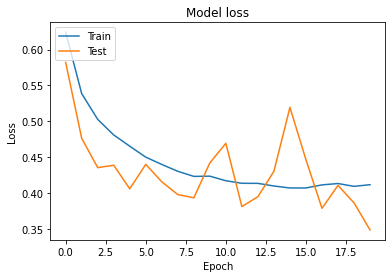

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
if not os.path.exists(os.path.join(DATA_PATH, 'model')):
    os.makedirs(os.path.join(DATA_PATH, 'model'))
model.save(os.path.join(DATA_PATH, 'model/keras_seq_model'))

2021-11-14 12:31:39.314781: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: data/model/keras_seq_model/assets
